In [1]:
import sys
import os

# Get the current working directory
notebook_path = os.getcwd()
# Go up one directory level to reach the project root
project_root = os.path.dirname(notebook_path)
# Add project root to Python path
sys.path.append(project_root)

import numpy as np
import matplotlib.pyplot as plt

from src.utils.training_data_gen import create_generator_from_grib

In [2]:
def plot_trajectory_on_wind_field(generator, ds, trajectory, pressure_level, figsize=(15, 10)):
    """
    Plot a trajectory on top of the wind field.
    
    Args:
        generator: WindFieldDataGenerator instance
        ds: xarray Dataset from create_generator_from_grib
        trajectory: Array of (lat, lon) pairs
        pressure_level: Pressure level being visualized
        figsize: Figure size
    """
    
    # Get wind components
    u_wind = ds['u'].sel(isobaricInhPa=pressure_level).squeeze()
    v_wind = ds['v'].sel(isobaricInhPa=pressure_level).squeeze()
    
    # Create mesh grid
    lons = ds.longitude.values
    lats = ds.latitude.values
    lon_mesh, lat_mesh = np.meshgrid(lons, lats)
    
    # Calculate wind speed for coloring
    wind_speed = np.sqrt(u_wind**2 + v_wind**2)
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Plot wind speed as background
    plt.pcolormesh(lon_mesh, lat_mesh, wind_speed, 
                   shading='auto',
                   cmap='viridis')
    plt.colorbar(label='Wind Speed (m/s)')
    
    # Plot wind vectors (downsampled)
    stride = 10
    plt.quiver(lon_mesh[::stride, ::stride],
               lat_mesh[::stride, ::stride],
               u_wind[::stride, ::stride],
               v_wind[::stride, ::stride],
               scale=500,
               color='white',
               alpha=0.5)
    
    # Plot trajectory
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:,1], trajectory[:,0], 
             'r-', linewidth=2, label='Particle trajectory')
    plt.plot(trajectory[0,1], trajectory[0,0], 'go', label='Start', markersize=5)
    plt.plot(trajectory[-1,1], trajectory[-1,0], 'ro', label='End', markersize=5)
    
    plt.title(f'Particle Trajectory at {pressure_level} hPa')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(0, 360)
    plt.ylim(-90, 90)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.show()


In [3]:
# Create generator and get dataset
PATH = '../data/gfs_4_20100808_1200_000.grb2'
generator, ds = create_generator_from_grib(PATH, pressure_level=1000, n_steps=1000)

Ignoring index file '../data/gfs_4_20100808_1200_000.grb2.47d85.idx' incompatible with GRIB file


Created generator for pressure level 1000 hPa
Grid resolution: 361x720
Latitude range: [-90.0, 90.0]
Longitude range: [0.0, 359.5]


In [7]:
# Generate a full trajectory
# start_lat, start_lon = 0.0, 175.0  # Example starting point
start_lat, start_lon = np.array([-61.0]), np.array([130.0])  # Example starting point
trajectory = generator.generate_full_trajectory(start_lat, start_lon)[0]

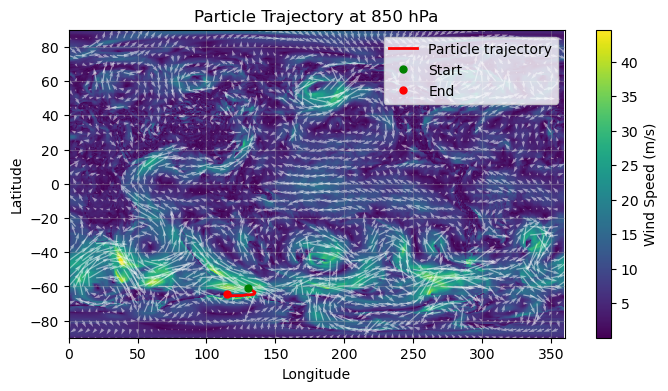

In [8]:
# Plot it
plot_trajectory_on_wind_field(generator, ds, trajectory, pressure_level=850, figsize=(8, 4))

Ignoring index file '../data/gfs_4_20100808_1200_000.grb2.47d85.idx' incompatible with GRIB file


Created generator for pressure level 1000 hPa
Grid resolution: 361x720
Latitude range: [-90.0, 90.0]
Longitude range: [0.0, 359.5]


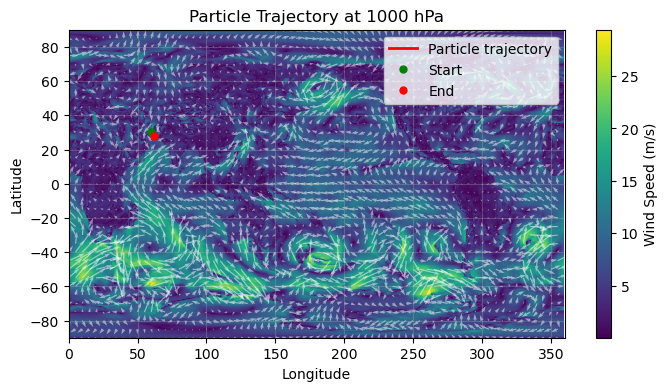

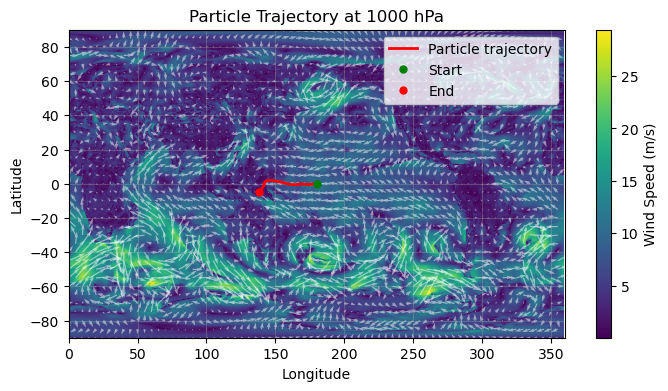

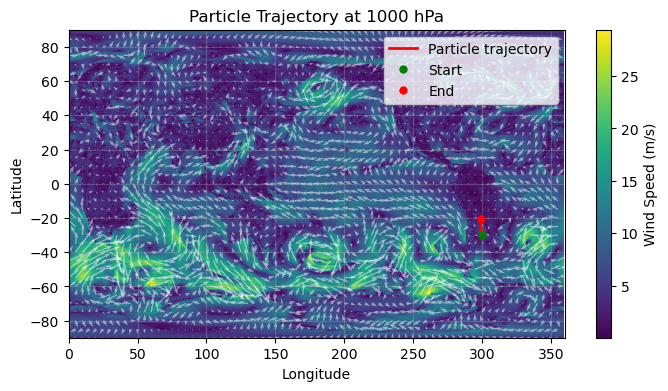

In [14]:
generator, ds = create_generator_from_grib(PATH, pressure_level=1000, n_steps=1000)
# Test points in the proper range

# start_points = np.array([
#     (30.0, 60.0),    # Eurasia
#     (0.0, 180.0),    # Pacific
#     (-30.0, 300.0),   # South America
# ])

start_lats = np.array([30.0, 0.0, -30.0])
start_lons = np.array([60.0, 180.0, 300.0])

trajectories = generator.generate_full_trajectory(start_lats, start_lons)
# print(trajectories.shape)
for trajectory in trajectories:
    plot_trajectory_on_wind_field(generator, ds, trajectory, pressure_level=1000, figsize=(8, 4))

# for start_lat, start_lon in start_points:
#     trajectory = generator.generate_full_trajectory(start_lat, start_lon)
#     plot_trajectory_on_wind_field(generator, ds, trajectory, pressure_level=1000, figsize=(8, 4))

Ignoring index file '../data/gfs_4_20100808_1200_000.grb2.47d85.idx' incompatible with GRIB file


Created generator for pressure level 1000 hPa
Grid resolution: 361x720
Latitude range: [-90.0, 90.0]
Longitude range: [0.0, 359.5]


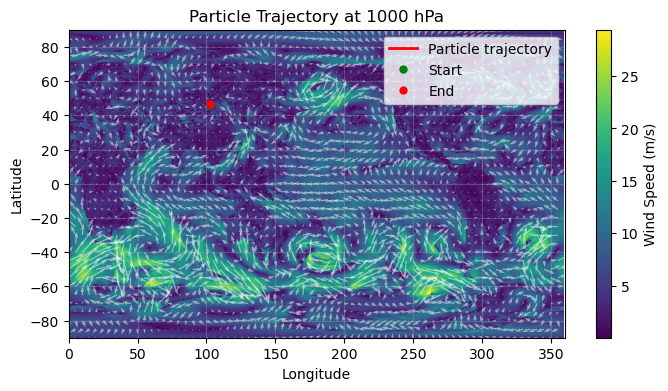

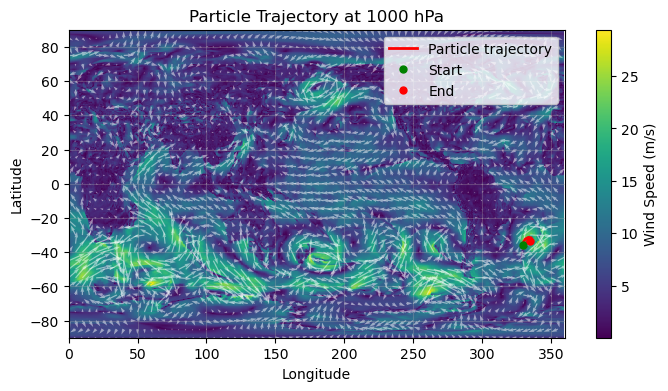

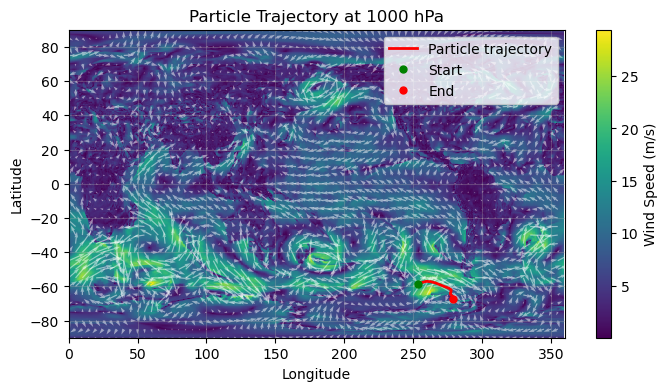

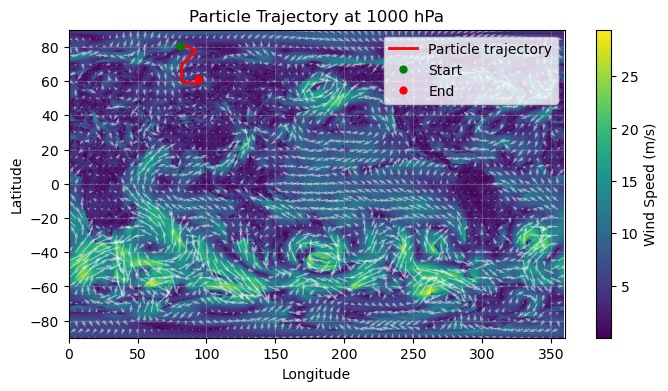

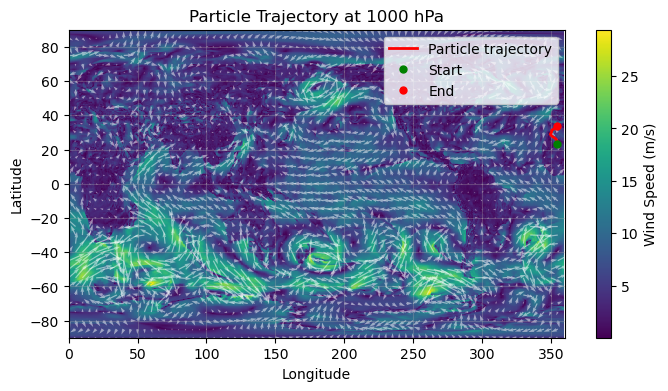

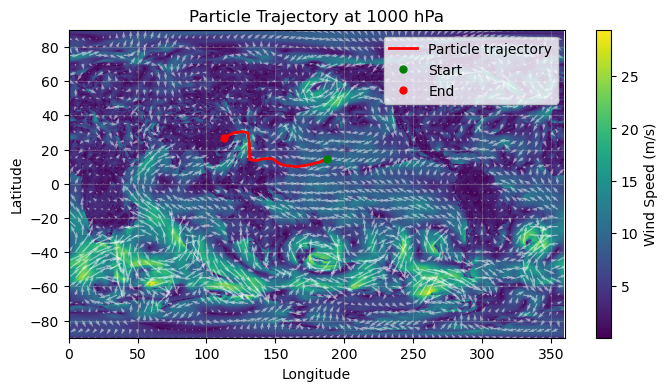

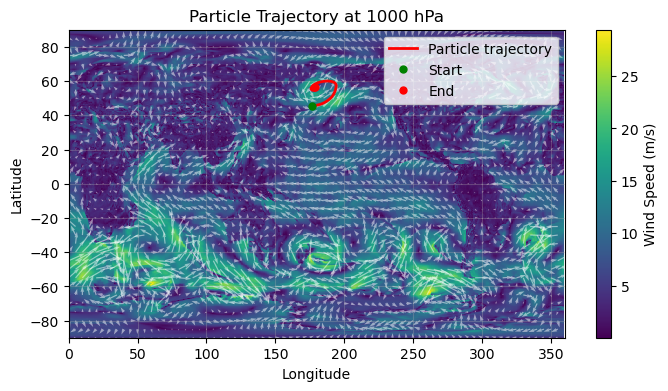

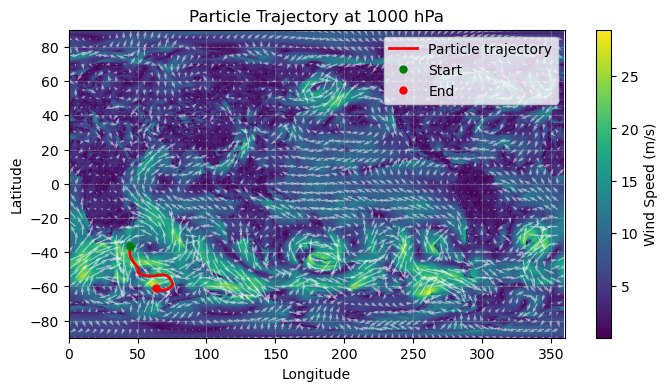

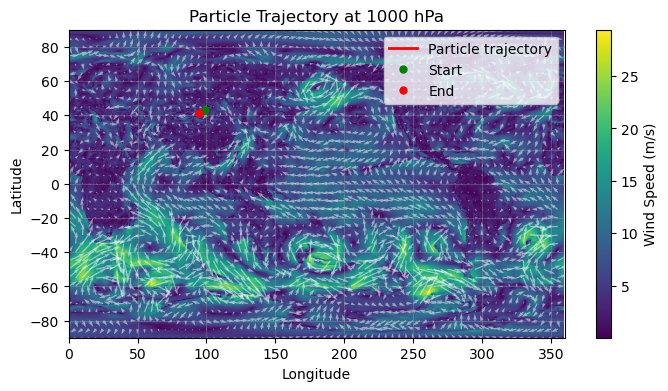

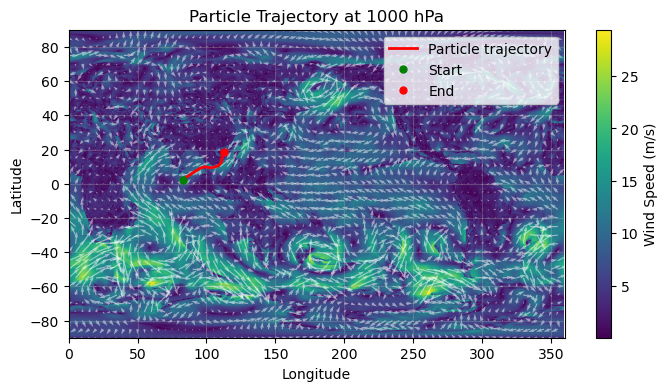

In [17]:
generator, ds = create_generator_from_grib(PATH, pressure_level=1000, n_steps=10000)

# Generate random points and simulate trajectories
# Can't do uniform for lats, would be biased towards poles
start_lats = np.arcsin(np.random.uniform(-1, 1, size=10)) * (180/np.pi)
start_lons = np.random.uniform(0, 360, size=10)
trajectories = generator.generate_full_trajectory(start_lats, start_lons)
for trajectory in trajectories:
    plot_trajectory_on_wind_field(generator, ds, trajectory, pressure_level=1000, figsize=(8, 4))

# # for _ in range(10):
# #     start_lat = np.random.uniform(-90, 90)
#     start_lon = np.random.uniform(0, 360)
#     trajectory = generator.generate_full_trajectory(start_lat, start_lon)
#     plot_trajectory_on_wind_field(generator, ds, trajectory, pressure_level=1000, figsize=(8, 4))

In [8]:
trajectory = generator.generate_full_trajectory(-30, 300)
print(trajectory[:100])

[[-30.         300.        ]
 [-29.40723654 299.91696832]
 [-28.77067997 299.77093639]
 [-28.08314309 299.59941484]
 [-27.37709162 299.44331464]
 [-26.67915597 299.32493283]
 [-26.03701395 299.23506326]
 [-25.50152726 299.16793562]
 [-25.04838983 299.1113884 ]
 [-24.64561678 299.06226511]
 [-24.281673   299.02649545]
 [-23.94331908 299.00204123]
 [-23.64526749 298.98680661]
 [-23.38827885 298.97743078]
 [-23.13829974 298.95959828]
 [-22.8913034  298.93194418]
 [-22.6583509  298.89977254]
 [-22.43961256 298.86638838]
 [-22.22786819 298.83607645]
 [-22.02032142 298.81047131]
 [-21.8141024  298.79154099]
 [-21.60584464 298.78087572]
 [-21.39573081 298.7783278 ]
 [-21.18281445 298.7906339 ]
 [-20.96923251 298.81688139]
 [-20.77824999 298.86317556]
 [-20.62439812 298.92856335]
 [-20.50784365 299.00596794]
 [-20.43122756 299.08878178]
 [-20.39058938 299.17007251]
 [-20.37700655 299.24572555]
 [-20.38339485 299.31363537]
 [-20.40422054 299.37299333]
 [-20.43516345 299.42378592]
 [-20.47283747